In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Offline Evaluation Results

In [4]:
df = pd.read_csv("offline_eval_results.csv")
llm_df = pd.read_csv("llm_offline_eval_results.csv")

df = pd.concat([df, llm_df]).reset_index(drop=True)

df = df.sort_values(by=['k', 'name'], ascending=[True, True])

# dropping Image Summary (Tone) rows
df = df[df['name']!="Image Summary (Tone)"]
df

,name,k,hit_rate,mean_avg_prec,ndcg
8,Image Summary (Keywords),1,0.180213,0.180213,0.000000
20,Llama-3.1 Recommendations,1,0.277850,0.277850,0.000000
0,Normal,1,0.165152,0.165152,0.000000
12,Screenshot Summary (Keywords),1,0.185926,0.185926,0.000000
16,Screenshot and Header Image Keywords,1,0.203064,0.203064,0.000000
9,Image Summary (Keywords),5,0.469229,0.141729,0.343800
21,Llama-3.1 Recommendations,5,0.450273,0.154973,0.325827
1,Normal,5,0.443002,0.130200,0.319237
13,Screenshot Summary (Keywords),5,0.477279,0.144274,0.352259
17,Screenshot and Header Image Keywords,5,0.502207,0.155596,0.375539


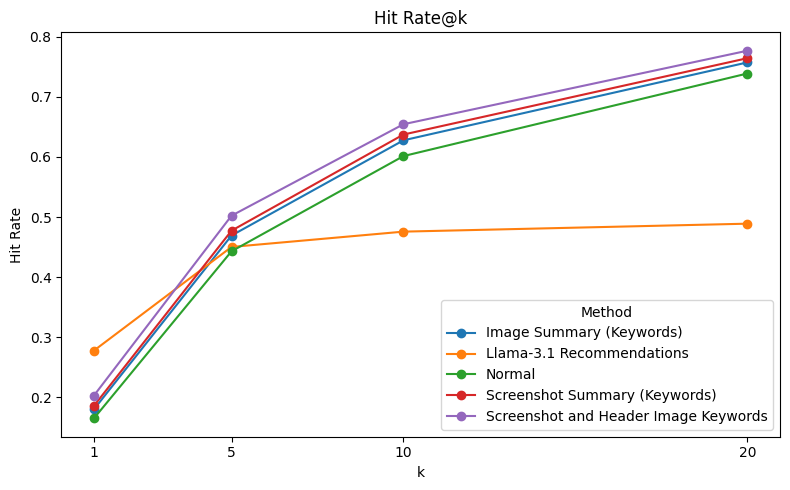

In [5]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['hit_rate'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Hit Rate')
plt.title('Hit Rate@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

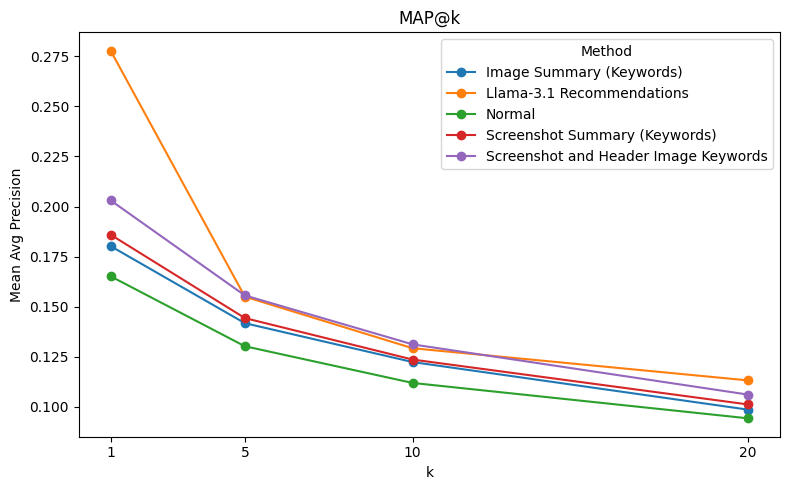

In [6]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['mean_avg_prec'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Mean Avg Precision')
plt.title('MAP@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

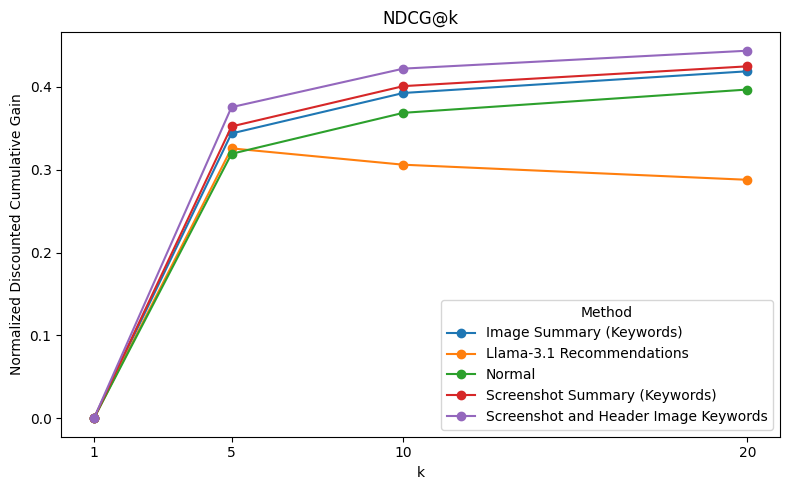

In [7]:
plt.figure(figsize=(8, 5))

for method in df['name'].unique():
    subset = df[df['name'] == method]
    plt.plot(subset['k'], subset['ndcg'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(df['k'].unique())))
plt.ylabel('Normalized Discounted Cumulative Gain')
plt.title('NDCG@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

# Explore Memory-based Collaborative Model Results

In [53]:
collab_filtering_df = pd.read_csv("collaborative_offline_eval_results.csv")
collab_filtering_df

,name,k,hit_rate,mean_avg_prec,ndcg
0,Memory-Based Collaborative Filtering,1,0.641392,0.641392,0.000000
1,Memory-Based Collaborative Filtering,5,0.896650,0.490548,0.767332
2,Memory-Based Collaborative Filtering,10,0.952480,0.407150,0.763806
3,Memory-Based Collaborative Filtering,20,0.977668,0.345812,0.744820


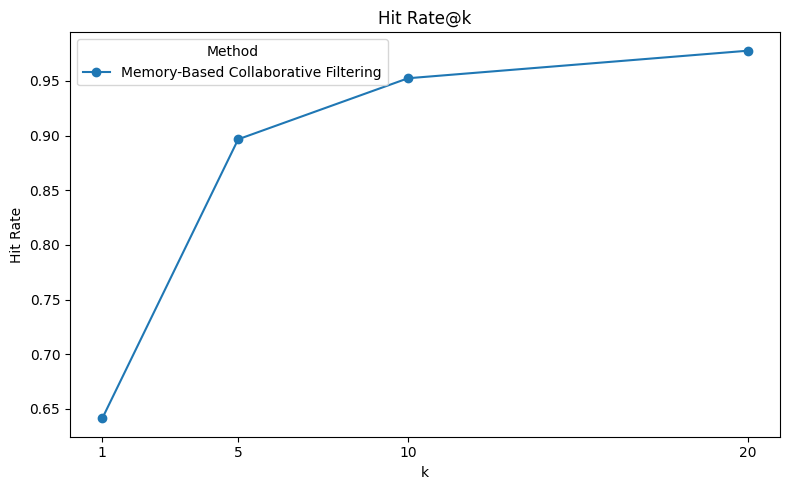

In [54]:
plt.figure(figsize=(8, 5))

for method in collab_filtering_df['name'].unique():
    subset = collab_filtering_df[collab_filtering_df['name'] == method]
    plt.plot(subset['k'], subset['hit_rate'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(collab_filtering_df['k'].unique())))
plt.ylabel('Hit Rate')
plt.title('Hit Rate@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

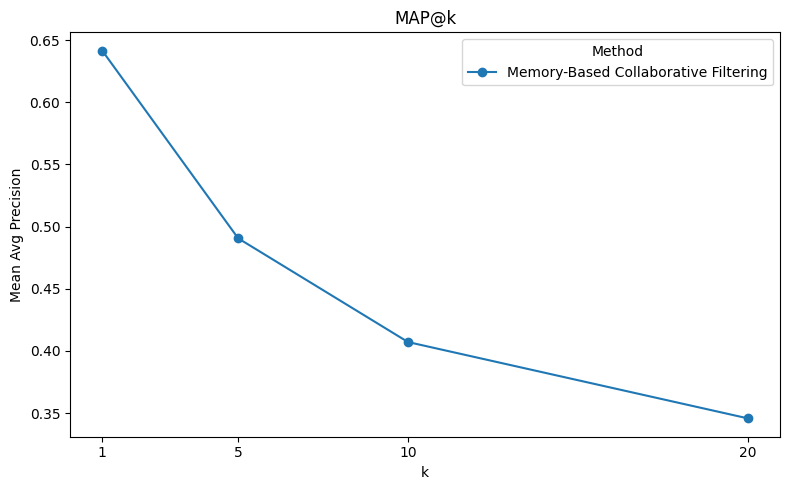

In [55]:
plt.figure(figsize=(8, 5))

for method in collab_filtering_df['name'].unique():
    subset = collab_filtering_df[collab_filtering_df['name'] == method]
    plt.plot(subset['k'], subset['mean_avg_prec'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(collab_filtering_df['k'].unique())))
plt.ylabel('Mean Avg Precision')
plt.title('MAP@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

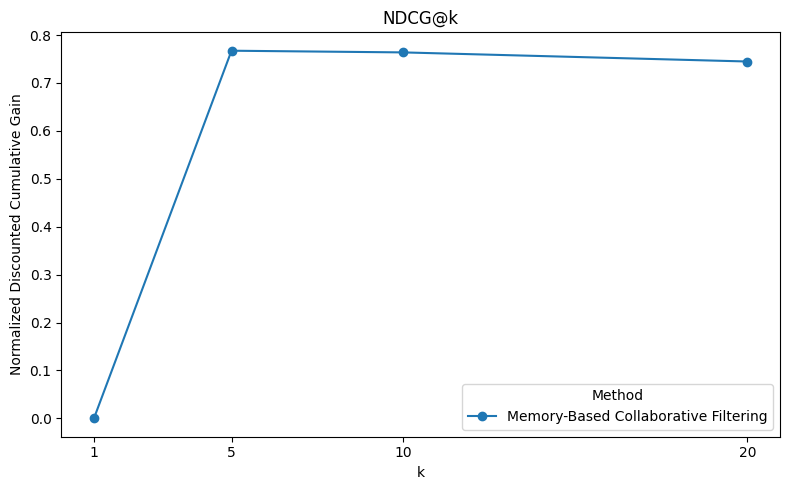

In [56]:
plt.figure(figsize=(8, 5))

for method in collab_filtering_df['name'].unique():
    subset = collab_filtering_df[collab_filtering_df['name'] == method]
    plt.plot(subset['k'], subset['ndcg'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(collab_filtering_df['k'].unique())))
plt.ylabel('Normalized Discounted Cumulative Gain')
plt.title('NDCG@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

# Explore Hyrbid Model Results

In [ ]:
hybrid_filtering_df = pd.read_csv("hybrid_hyperparameter_tuning_20250729_014354.csv")
hybrid_filtering_df_v2 = pd.read_csv("hybrid_hyperparameter_tuning_20250729_155537.csv")

hybrid_filtering_df = pd.concat([hybrid_filtering_df, hybrid_filtering_df_v2])

def get_method_name(row):
    return f"Weight={row['weight']} | Num_Train_Examples={row['num_train_examples']}"
hybrid_filtering_df['method'] = hybrid_filtering_df[['weight', 'num_train_examples']].apply(get_method_name, axis=1)

hybrid_filtering_df

,weight,num_train_examples,k,hit_rate,mean_avg_prec,ndcg,method
0,0.800,NaN,1,0.672812,0.600623,0.363412,Weight=0.8 | Num_Train_Examples=nan
1,0.800,NaN,5,0.921579,0.413763,0.629114,Weight=0.8 | Num_Train_Examples=nan
2,0.800,NaN,10,0.968839,0.335939,0.643888,Weight=0.8 | Num_Train_Examples=nan
3,0.800,NaN,20,0.983900,0.275396,0.633107,Weight=0.8 | Num_Train_Examples=nan
4,0.800,5.0,1,0.704233,0.555959,0.364970,Weight=0.8 | Num_Train_Examples=5.0
5,0.800,5.0,5,0.926513,0.408933,0.645001,Weight=0.8 | Num_Train_Examples=5.0
6,0.800,5.0,10,0.969878,0.334329,0.648602,Weight=0.8 | Num_Train_Examples=5.0
7,0.800,5.0,20,0.984160,0.271579,0.639952,Weight=0.8 | Num_Train_Examples=5.0
8,0.800,10.0,1,0.686315,0.581148,0.360815,Weight=0.8 | Num_Train_Examples=10.0
9,0.800,10.0,5,0.926513,0.415736,0.635209,Weight=0.8 | Num_Train_Examples=10.0


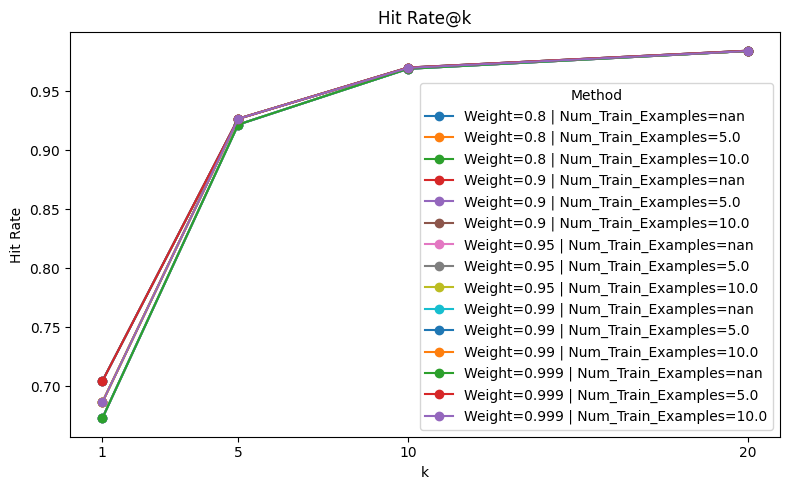

In [28]:
plt.figure(figsize=(8, 5))

for method in hybrid_filtering_df['method'].unique():
    subset = hybrid_filtering_df[hybrid_filtering_df['method'] == method]
    plt.plot(subset['k'], subset['hit_rate'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(hybrid_filtering_df['k'].unique())))
plt.ylabel('Hit Rate')
plt.title('Hit Rate@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

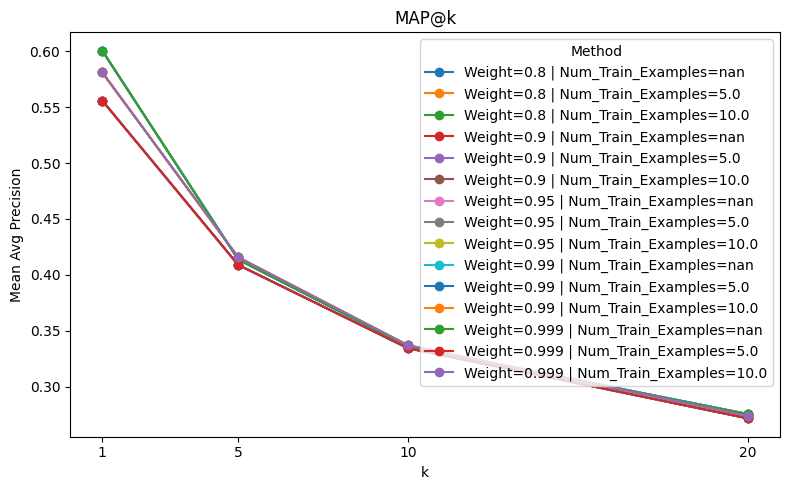

In [29]:
plt.figure(figsize=(8, 5))

for method in hybrid_filtering_df['method'].unique():
    subset = hybrid_filtering_df[hybrid_filtering_df['method'] == method]
    plt.plot(subset['k'], subset['mean_avg_prec'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(hybrid_filtering_df['k'].unique())))
plt.ylabel('Mean Avg Precision')
plt.title('MAP@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

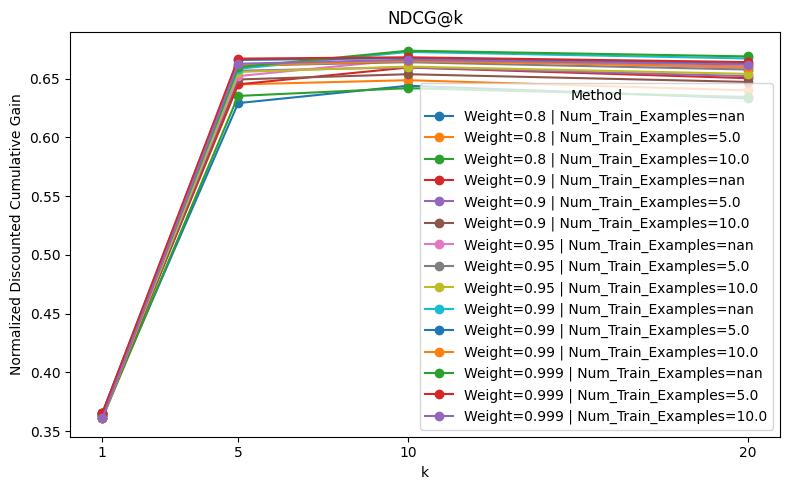

In [30]:
plt.figure(figsize=(8, 5))

for method in hybrid_filtering_df['method'].unique():
    subset = hybrid_filtering_df[hybrid_filtering_df['method'] == method]
    plt.plot(subset['k'], subset['ndcg'], marker='o', label=method)

plt.xlabel('k')
plt.xticks(sorted(list(hybrid_filtering_df['k'].unique())))
plt.ylabel('Normalized Discounted Cumulative Gain')
plt.title('NDCG@k')
plt.legend(
    title='Method', 
)
plt.tight_layout()
plt.show()

# Analyze Memory-based Collaborative Filtering and Hybrid Filtering Together

In [36]:
collab_filtering_df

,name,k,hit_rate,mean_avg_prec,ndcg
0,Memory-Based Collaborative Filtering,1,0.641392,0.641392,0.000000
1,Memory-Based Collaborative Filtering,5,0.896650,0.490548,0.767332
2,Memory-Based Collaborative Filtering,10,0.952480,0.407150,0.763806
3,Memory-Based Collaborative Filtering,20,0.977668,0.345812,0.744820


In [37]:
temp_hybrid_filtering_df = hybrid_filtering_df.rename(columns={'method': 'name'})
temp_hybrid_filtering_df = temp_hybrid_filtering_df[['name', 'k', 'hit_rate', 'mean_avg_prec', 'ndcg']]

combined_df = pd.concat([collab_filtering_df, temp_hybrid_filtering_df])
combined_df

,name,k,hit_rate,mean_avg_prec,ndcg
0,Memory-Based Collaborative Filtering,1,0.641392,0.641392,0.000000
1,Memory-Based Collaborative Filtering,5,0.896650,0.490548,0.767332
2,Memory-Based Collaborative Filtering,10,0.952480,0.407150,0.763806
3,Memory-Based Collaborative Filtering,20,0.977668,0.345812,0.744820
0,Weight=0.8 | Num_Train_Examples=nan,1,0.672812,0.600623,0.363412
...,...,...,...,...,...
19,Weight=0.999 | Num_Train_Examples=5.0,20,0.984160,0.271579,0.664028
20,Weight=0.999 | Num_Train_Examples=10.0,1,0.686315,0.581148,0.360815
21,Weight=0.999 | Num_Train_Examples=10.0,5,0.926513,0.415736,0.662618
22,Weight=0.999 | Num_Train_Examples=10.0,10,0.969618,0.336874,0.665973


In [46]:
import plotly.express as px

In [47]:
def create_bar_chart_plotly(df, x, y, color, title, labels):
    df[x] = df[x].astype(str)

    fig = px.bar(
        df,
        x=x,
        y=y,
        color=color,
        barmode="group",
        title=title,
        labels=labels
    )

    fig.update_xaxes(tickvals=sorted(df[x].unique()))
    fig.show()

In [48]:
create_bar_chart_plotly(
    combined_df,
    x="k", 
    y="hit_rate", 
    color="name", 
    title="Hit Rate@k (Collaborative & Hybrid Filtering)", 
    labels={"k": "k", "hit_rate": "Hit Rate", "name": "Method"}
)

In [51]:
create_bar_chart_plotly(
    combined_df,
    x="k", 
    y="mean_avg_prec", 
    color="name", 
    title="MAP@k (Collaborative & Hybrid Filtering)", 
    labels={"k": "k", "mean_avg_prec": "Mean Avg Precision", "name": "Method"}
)

In [52]:
create_bar_chart_plotly(
    combined_df,
    x="k", 
    y="ndcg", 
    color="name", 
    title="NDCG@k (Collaborative & Hybrid Filtering)", 
    labels={"k": "k", "ndcg": "NDCG", "name": "Method"}
)